In [114]:
import fiona
import numpy as np
import math
import pandas as pd
import geopandas as gpd
import utm
from shapely.geometry import Point, box, Polygon
from shapely.strtree import STRtree
from shapely.geometry import GeometryCollection

In [2]:
g13 = gpd.read_file('shp/az_naip_2013.geojson')
g15 = gpd.read_file('shp/az_naip_2015.geojson')
g17 = gpd.read_file('shp/az_naip_2017.geojson')

In [102]:
coords = (33.439856, -112.066936)
coords = Point(coords[::-1])

POINT (-112.066936 33.439856)


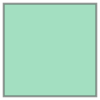

In [118]:
bbox = box(*coords.buffer(0.01, cap_style=3).bounds)
bbox

In [115]:
matches = []

In [62]:
%%time
utm.from_latlon(coords.y, coords.x)

CPU times: user 267 µs, sys: 200 µs, total: 467 µs
Wall time: 271 µs


(400826.50115206203, 3700560.022063258, 12, 'S')

In [63]:
%%time
m13 = g13[g13.geometry.intersects(coords)]

CPU times: user 40.3 ms, sys: 3.93 ms, total: 44.2 ms
Wall time: 44.5 ms


In [119]:
#%%timeit pass
gx, gy = str(int(abs(coords.x))), str(int(coords.y))

In [120]:
gx, gy

('112', '33')

In [122]:
%%timeit pass
gx, gy = str(int(abs(coords.x))), str(int(coords.y))
match = g13[(g13.DX == gx) & (g13.DY == gy)]
match[match.geometry.intersects(coords)]

4.87 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
def dd_dms(dd):
    is_positive = (dd >= 0)
    dd = abs(dd)
    m, s = divmod(dd*3600, 60)
    d, m = divmod(m, 60)
    d = d if is_positive else -d
    return (abs(int(d)), int(m), round(s,6))

In [124]:
%%timeit pass
yd, ym, ys = dd_dms(coords.y)
xd, xm, xs = dd_dms(coords.x)
match = g13[(g13.DX.astype(np.int) == xd) & (g13.DY.astype(np.int) == yd)]
match = match[match.geometry.intersects(coords)]

5.14 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [133]:
%%timeit pass
dx, dy = abs(int(coords.x)), int(coords.y)
match = g13[(g13.DX.astype(np.int) == dx) & (g13.DY.astype(np.int) == dy)]
match = match[match.geometry.intersects(coords)]

5.52 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [130]:
match

,AREA,PERIMETER,ST,QQNAME,QKEY,QUADRANT,APFONAME,GNIS,DY,MY,...,ArcKey,Band,USGSID,Qdrnt,UTM,Res,SrcImgDate,VerDate,FileName,geometry
4982,0.004,0.25,AZ,PHOENIX NW,3326151120345,NW,3311240,33112d1,33,26,...,3326151120345,M4B,3311240,NW,12,1,20130605,20130819,m_3311240_nw_12_1_20130605_20130819.tif,POLYGON ((-112.1249999997502 33.49999999970032...


In [245]:
yd, ym, ys = dd_dms(coords.y)
xd, xm, xs = dd_dms(coords.x)
((str(yd) + str(ym)), (str(xd) + str(xm)))

('3326', '1124')

In [250]:
def dms_str(d, m, s):
    if d < 10 and d > 0:
        d = '0' + str(d)
    if m < 10:
        m = '0' + str(m)
    return (str(d), str(m), str(s))

In [251]:
dms_str(yd, ym, ys)

('33', '26', '23.4816')

In [253]:
dms_str(xd, xm, xs)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 26 µs


('112', '04', '0.9696')

In [140]:
match.OLAT.values[0], match.OLONG.values[0]

('332615', '1120345')

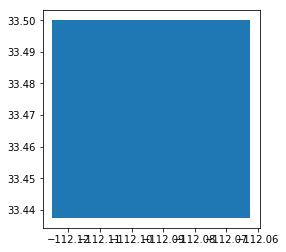

In [139]:
%matplotlib inline

match.plot(column='QUADRANT')

In [214]:
a

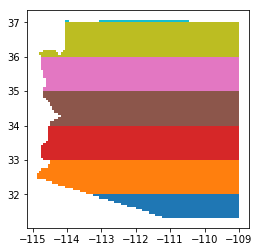

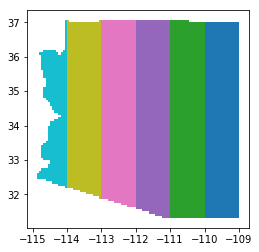

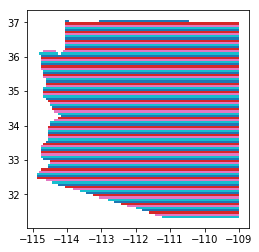

In [220]:
g13.plot('DY')
g13.plot('DX')
g13.plot('SY')

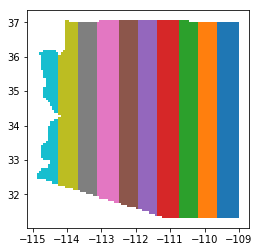

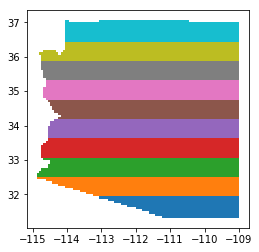

In [232]:
g13.plot('OLONG')
g13.plot('OLAT')

In [275]:
%%time
m15 = g15[g15.geometry.intersects(p)]

NameError: name 'p' is not defined

In [70]:
%%time
m17 = g17[g17.geometry.intersects(p)]

CPU times: user 43 ms, sys: 2.04 ms, total: 45.1 ms
Wall time: 43.3 ms


In [271]:
m13.OLAT

4982    332615
Name: OLAT, dtype: object

In [103]:
m15

,AREA,PERIMETER,ST,QQNAME,QKEY,QUADRANT,APFONAME,GNIS,DY,MY,...,ArcKey,Band,USGSID,Qdrnt,UTM,Res,SrcImgDate,VerDate,FileName,geometry
4982,0.004,0.25,AZ,PHOENIX NW,3326151120345,NW,3311240,33112d1,33,26,...,3326151120345,M4B,3311240,NW,12,1,20150529,20151022,m_3311240_nw_12_1_20150529_20151022.tif,"POLYGON ((-112.125 33.5, -112.0625 33.5, -112...."


In [274]:
m17.OLAT

0       370000
1       370000
2       370000
3       370000
4       370000
5       370000
6       370000
7       370000
8       370000
9       370000
10      370000
11      370000
12      370000
13      370000
14      370000
15      370000
16      370000
17      370000
18      370000
19      370000
20      370000
21      370000
22      370000
23      370000
24      370000
25      370000
26      370000
27      370000
28      370000
29      370000
         ...  
7599    311845
7600    311845
7601    311845
7602    311845
7603    311845
7604    311845
7605    311845
7606    311845
7607    311845
7608    311845
7609    311845
7610    311845
7611    311845
7612    311845
7613    311845
7614    311845
7615    311845
7616    311845
7617    311845
7618    311845
7619    311845
7620    311845
7621    311845
7622    311845
7623    311845
7624    311845
7625    311845
7626    311845
7627    311845
7628    311845
Name: OLAT, Length: 7629, dtype: object

In [107]:
fn = match.at[midx, 'FileName']
fn = fn.replace('.tif', '.mrf')

In [127]:
%%timeit pass
usgs_id = match.at[midx, 'USGSID']
quad = usgs_id[:-2]

4.86 µs ± 85.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [133]:
timeres = ['2017/60cm', '2015/100cm', '2013/100cm']
s3s = ['s3://naip-analytic/az/{}/rgbir/{}'.format(res, '/'.join([quad, fn])) for res in timeres]

In [130]:
import rasterio
import os
os.environ['AWS_REQUEST_PAYER'] = 'requester'
os.environ['AWS_DEFAULT_REGION'] = 'us-west-2'

In [131]:
%%time
with rasterio.open(cog_url, driver='MRF') as cog:
    coimg = xr.open_rasterio(cog, chunks={'x': 512, 'y': 512})

In [ ]:
naip = 's3://naip-analytic/az/2017/60cm/rgbir/31111/m_3111139_ne_12_h_20170610.mrf'

In [62]:
for k, v in match.items():
    print(k, v.values[0])

AREA 0.004
PERIMETER 0.25
ST AZ
QQNAME THREE POINTS NE
QKEY 3203451111500
QUADRANT NE
APFONAME 3211162
GNIS 32111a3
DY 32
MY 03
SY 45
DX 111
MX 15
SX 00
OLAT 320345
OLONG 1111500
ArcKey 3203451111500
Band M4B
USGSID 3211162
Qdrnt NE
UTM 12
Res 1
SrcImgDate 20130608
VerDate 20130819
FileName m_3211162_ne_12_1_20130608_20130819.tif
geometry POLYGON ((-111.3124999995753 32.12499999975023, -111.2499999997001 32.12499999975023, -111.2499999997001 32.06249999987517, -111.3124999995753 32.06249999987517, -111.3124999995753 32.12499999975023))


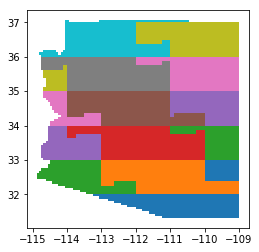

In [29]:
%matplotlib inline
gdf17.plot(column='USGSID')

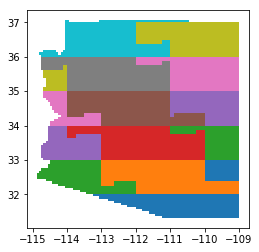

In [105]:
%matplotlib inline
gdf17.plot(column='APFONAME')

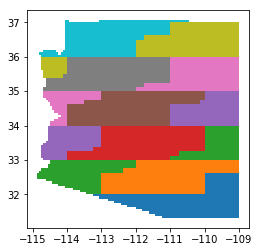

In [36]:
gdf17.plot(column='GNIS')

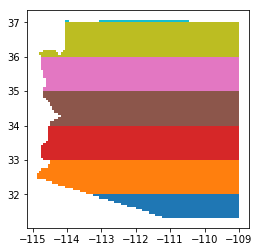

In [40]:
gdf17.plot(column='DY')

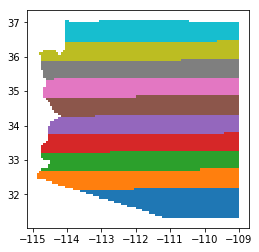

In [49]:
gdf17.plot(column='QKEY')

In [34]:
gdf17.columns

Index(['AREA', 'PERIMETER', 'ST', 'QQNAME', 'QKEY', 'QUADRANT', 'APFONAME',
       'GNIS', 'DY', 'MY', 'SY', 'DX', 'MX', 'SX', 'OLAT', 'OLONG', 'ArcKey',
       'Band', 'USGSID', 'Qdrnt', 'UTM', 'Res', 'SrcImgDate', 'VerDate',
       'FileName', 'geometry'],
      dtype='object')